<a href="https://colab.research.google.com/github/sidharkal/Analytics-Olympiad-2022-/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing 🛠

In [1]:
# Import Data Libraries
import pandas as pd
import numpy as np

# Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

##  Importing the data

In [2]:
# Read in the datasets
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

# Drop ID columns
train.drop(columns="ID", axis=1, inplace=True)
test.drop(columns="ID", axis=1, inplace=True)


# Explore the head of the dataframe
train.head()

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,40-64,female,20-29y,university,middle class,0.638050,0.0,after 2015,0.0,0.0,37379,11000.0,0,0,0,0.0,Sports Car
1,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,1.0,0.0,10238,9000.0,0,0,0,1.0,HatchBack
2,40-64,male,20-29y,none,middle class,0.839817,1.0,before 2015,1.0,1.0,10238,12000.0,0,0,0,1.0,Sedan
3,40-64,male,20-29y,high school,upper class,0.682527,1.0,before 2015,0.0,1.0,92099,6000.0,1,0,0,1.0,Sedan
4,40-64,female,20-29y,none,working class,0.572184,1.0,after 2015,1.0,1.0,32122,15000.0,0,0,1,0.0,Sedan


In [3]:
test.head()

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,TYPE_OF_VEHICLE
0,40-64,male,10-19y,none,working class,0.814707,1.0,after 2015,0.0,1.0,10238,10000.0,0,0,0,HatchBack
1,26-39,female,20-29y,high school,upper class,0.344051,1.0,before 2015,0.0,0.0,34073,13000.0,0,0,0,Sedan
2,40-64,male,10-19y,none,upper class,0.620691,0.0,after 2015,1.0,0.0,10238,12000.0,0,0,0,SUV
3,26-39,male,20-29y,high school,upper class,0.689658,1.0,after 2015,1.0,1.0,10238,16000.0,1,0,0,SUV
4,65+,male,10-19y,none,middle class,0.755666,0.0,after 2015,0.0,1.0,92101,14000.0,2,0,0,HatchBack


In [4]:
# Explore the format
print("Train shape: {}".format(train.shape))
print("Test shape: {}".format(test.shape))

Train shape: (105000, 17)
Test shape: (45000, 16)


In [5]:
train.columns

Index(['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',
       'DUIS', 'PAST_ACCIDENTS', 'OUTCOME', 'TYPE_OF_VEHICLE'],
      dtype='object')

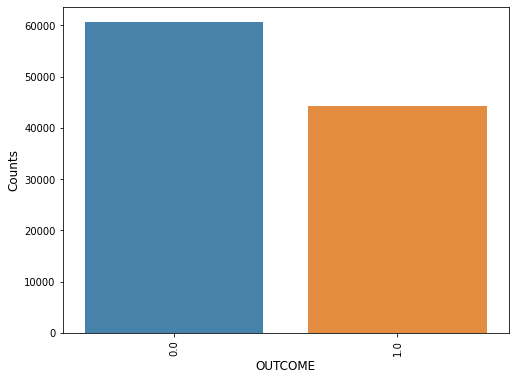

In [6]:
# Plot of the target column
label_counts = train.OUTCOME.value_counts()
plt.figure(figsize = (8,6))
sns.barplot(label_counts.index, label_counts.values, alpha = 0.9)
plt.xticks(rotation = 'vertical')
plt.xlabel('OUTCOME', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

##  Numerical Data

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   AGE                  105000 non-null  object 
 1   GENDER               105000 non-null  object 
 2   DRIVING_EXPERIENCE   105000 non-null  object 
 3   EDUCATION            105000 non-null  object 
 4   INCOME               105000 non-null  object 
 5   CREDIT_SCORE         105000 non-null  float64
 6   VEHICLE_OWNERSHIP    105000 non-null  float64
 7   VEHICLE_YEAR         105000 non-null  object 
 8   MARRIED              105000 non-null  float64
 9   CHILDREN             105000 non-null  float64
 10  POSTAL_CODE          105000 non-null  int64  
 11  ANNUAL_MILEAGE       105000 non-null  float64
 12  SPEEDING_VIOLATIONS  105000 non-null  int64  
 13  DUIS                 105000 non-null  int64  
 14  PAST_ACCIDENTS       105000 non-null  int64  
 15  OUTCOME          

In [8]:
# Select ONLY numerical columns
numerical_cols = [col for col in train.columns if train[col].dtype in ["int64", "float64"]]
numerical_cols

['CREDIT_SCORE',
 'VEHICLE_OWNERSHIP',
 'MARRIED',
 'CHILDREN',
 'POSTAL_CODE',
 'ANNUAL_MILEAGE',
 'SPEEDING_VIOLATIONS',
 'DUIS',
 'PAST_ACCIDENTS',
 'OUTCOME']

## Categorical Data

In [9]:
# Select ONLY categorical columns
categ_cols = [col for col in train.columns if train[col].dtype in ["object"]]
categ_cols

['AGE',
 'GENDER',
 'DRIVING_EXPERIENCE',
 'EDUCATION',
 'INCOME',
 'VEHICLE_YEAR',
 'TYPE_OF_VEHICLE']

## Missing Value

In [10]:
# Missing Value
train.isna().sum()

AGE                    0
GENDER                 0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
TYPE_OF_VEHICLE        0
dtype: int64



AGE Category Distribution 




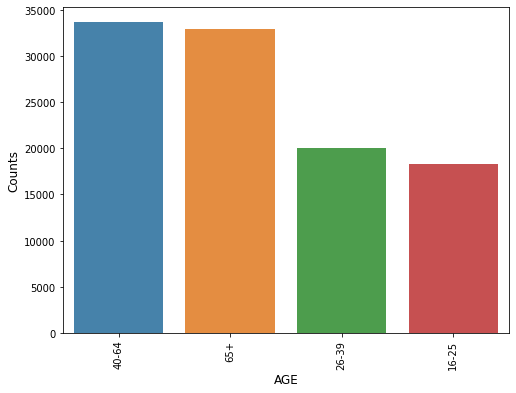



GENDER Category Distribution 




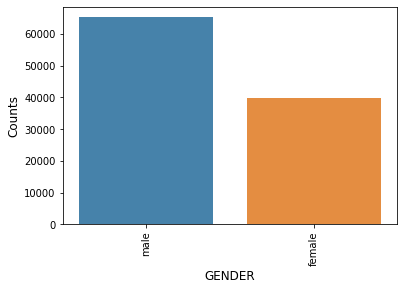



DRIVING_EXPERIENCE Category Distribution 




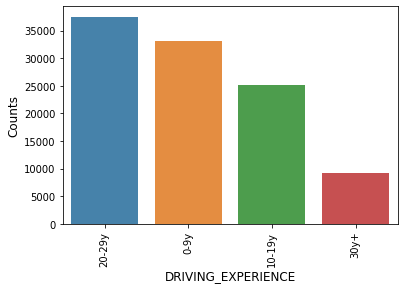



EDUCATION Category Distribution 




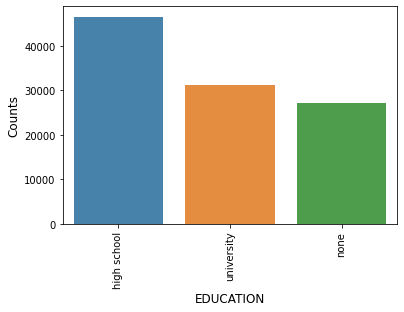



INCOME Category Distribution 




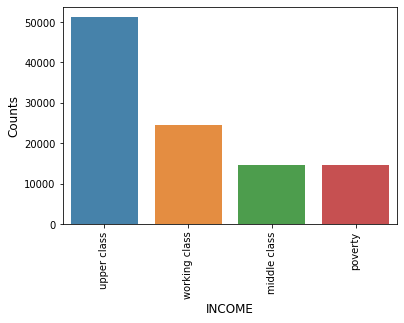



VEHICLE_YEAR Category Distribution 




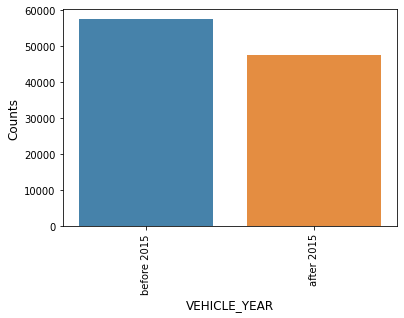



TYPE_OF_VEHICLE Category Distribution 




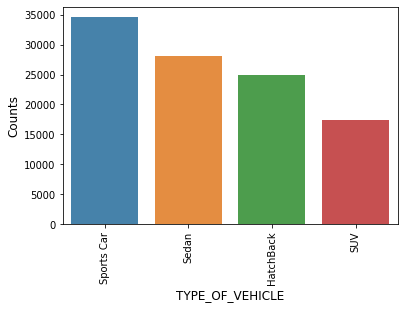

In [11]:
plt.figure(figsize = (8,6))

for i in categ_cols:
  print("====================================================================")
  print("\n")
  print(str(i) + ' Category Distribution ')
  print("\n")
  label_counts = train[str(i)].value_counts()
  sns.barplot(label_counts.index, label_counts.values, alpha = 0.9)
  plt.xticks(rotation = 'vertical')
  plt.xlabel(str(i), fontsize =12)
  plt.ylabel('Counts', fontsize = 12)
  plt.show()



# Numerical Columns


*   Some of the columns from numerical column having categorical data such as Married, Past Accident, Postal code and others 

*   Therefore we need to convert that features into categorical features






CREDIT_SCORE Distribution 
CREDIT_SCORESkewness       :  -0.22635846682430696




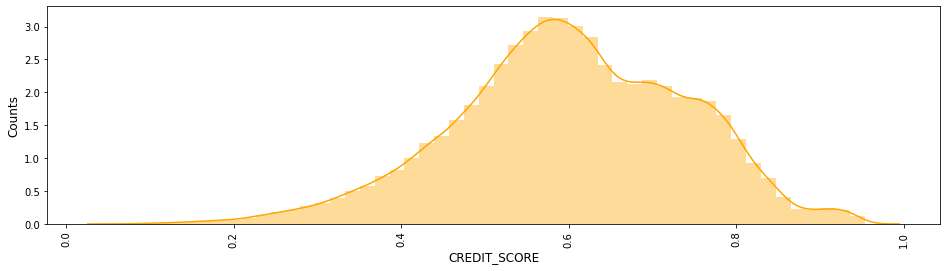



ANNUAL_MILEAGE Distribution 
ANNUAL_MILEAGESkewness       :  -0.5101178559817349




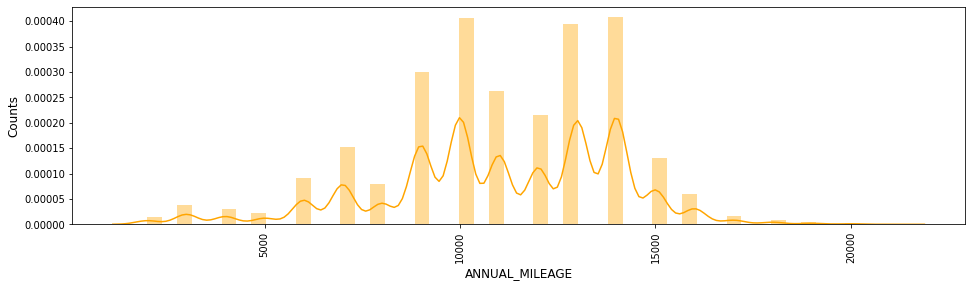

In [12]:

for i in ['CREDIT_SCORE','ANNUAL_MILEAGE']:
  print("================================================================================================================================")
  print("\n")
  print(str(i) + ' Distribution ')
  print(str(i) + 'Skewness       : ',train[str(i)].skew())
  plt.figure(figsize = (16, 4))
  print("\n")
  sns.distplot(a = train[str(i)], color = "orange")
  plt.xticks(rotation = 'vertical')
  plt.xlabel(str(i), fontsize =12)
  plt.ylabel('Counts', fontsize = 12)
  plt.show()


In [13]:
numerical_cols

['CREDIT_SCORE',
 'VEHICLE_OWNERSHIP',
 'MARRIED',
 'CHILDREN',
 'POSTAL_CODE',
 'ANNUAL_MILEAGE',
 'SPEEDING_VIOLATIONS',
 'DUIS',
 'PAST_ACCIDENTS',
 'OUTCOME']

# Convert Numerical into Categorical Feature 

In [14]:
train["VEHICLE_OWNERSHIP"] = train["VEHICLE_OWNERSHIP"].astype("object")
train["MARRIED"] = train["MARRIED"].astype("object")
train["CHILDREN"] = train["CHILDREN"].astype("object")
train["POSTAL_CODE"] = train["POSTAL_CODE"].astype("object")

train["SPEEDING_VIOLATIONS"] = train["SPEEDING_VIOLATIONS"].astype("object")
train["DUIS"] = train["DUIS"].astype("object")
train["PAST_ACCIDENTS"] = train["PAST_ACCIDENTS"].astype("object")
train["OUTCOME"] = train["OUTCOME"].astype("object")

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   AGE                  105000 non-null  object 
 1   GENDER               105000 non-null  object 
 2   DRIVING_EXPERIENCE   105000 non-null  object 
 3   EDUCATION            105000 non-null  object 
 4   INCOME               105000 non-null  object 
 5   CREDIT_SCORE         105000 non-null  float64
 6   VEHICLE_OWNERSHIP    105000 non-null  object 
 7   VEHICLE_YEAR         105000 non-null  object 
 8   MARRIED              105000 non-null  object 
 9   CHILDREN             105000 non-null  object 
 10  POSTAL_CODE          105000 non-null  object 
 11  ANNUAL_MILEAGE       105000 non-null  float64
 12  SPEEDING_VIOLATIONS  105000 non-null  object 
 13  DUIS                 105000 non-null  object 
 14  PAST_ACCIDENTS       105000 non-null  object 
 15  OUTCOME          



VEHICLE_OWNERSHIP Category Distribution 




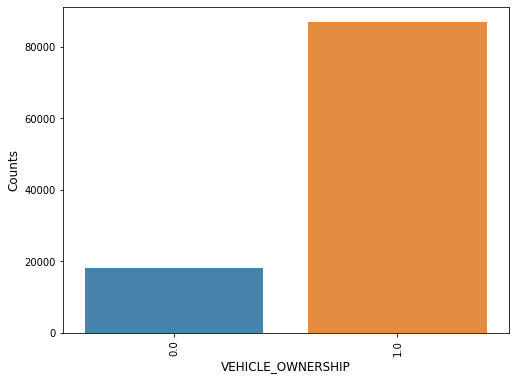



MARRIED Category Distribution 




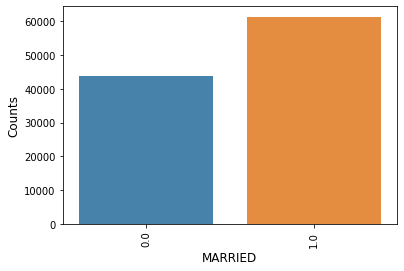



CHILDREN Category Distribution 




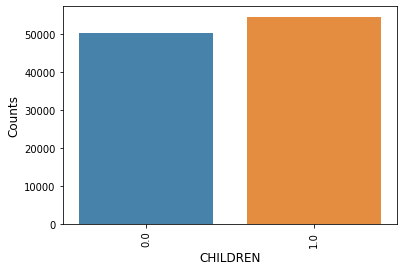



SPEEDING_VIOLATIONS Category Distribution 




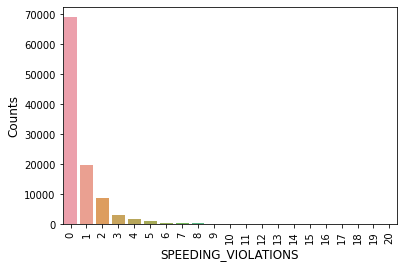



DUIS Category Distribution 




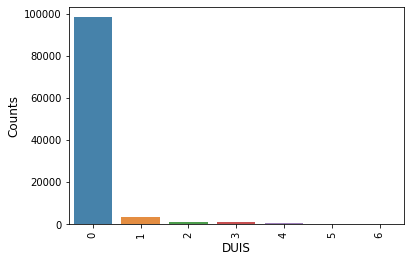



PAST_ACCIDENTS Category Distribution 




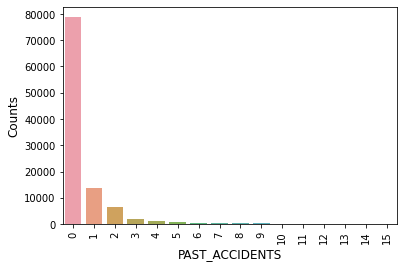

In [16]:
plt.figure(figsize = (8,6))

for i in ['VEHICLE_OWNERSHIP','MARRIED','CHILDREN','SPEEDING_VIOLATIONS','DUIS','PAST_ACCIDENTS']:
  print("====================================================================")
  print("\n")
  print(str(i) + ' Category Distribution ')
  print("\n")
  label_counts = train[str(i)].value_counts()
  sns.barplot(label_counts.index, label_counts.values, alpha = 0.9)
  plt.xticks(rotation = 'vertical')
  plt.xlabel(str(i), fontsize =12)
  plt.ylabel('Counts', fontsize = 12)
  plt.show()

In [17]:
print("POSTAL_CODE having Different unique code : ",len(train['POSTAL_CODE'].unique()))

POSTAL_CODE having Different unique code :  10937
